### Import Libraries

In [20]:
import numpy as np
import pandas as pd
import import_ipynb
import matplotlib.pyplot as plt

In [21]:
from kmeans import kmeans
from kmeanspp import compute_distance

## K-Means Testing

### Calculate Inertia

In [27]:
# Input
# centers: array containing all centroids
# clustered_data: all data points along with it's cluster
# Output
# Inertia
def calculate_inertia(centers, clustered_data):
    inertia = 0
    num_rows = clustered_data.shape[0]
    for i in range(num_rows):
        cluster_index = int(clustered_data[i][-1])
        center = centers[cluster_index]
        point = clustered_data[i][:-1]
        inertia += compute_distance(point, center)
    return inertia


### Calculate Dunn Index

In [44]:
# Input
# centers: array containing all centroids
# clustered_data: all data points along with it's cluster
# Output
# Dunn Index
def calculate_dunn_index(centers):
    if len(centers) < 2:
        return 1
    dist = []
    num_centers = len(centers)
    for i in range(num_centers):
        for j in range(i+1, num_centers):
            dist.append(compute_distance(centers[i], centers[j]))
    min_dist = dist[0]
    max_dist = dist[0]
    for i in range(1, len(dist)):
        min_dist = min(min_dist, dist[i])
        max_dist = max(max_dist, dist[i])
    return min_dist / max_dist

### Plot Inertia and Dunn Index vs K

In [41]:
def plotGraphs(data, maxK = 10):
    inertias = []
    dunn_indices = []
    Ks = range(1, maxK + 1)
    for i in range(1, maxK + 1):
        clustered_data, centers = kmeans(i, data)
        inertia = calculate_inertia(centers, clustered_data)
        dunn_index = calculate_dunn_index(centers)
        inertias.append(inertia)
        dunn_indices.append(dunn_index)
        print(inertia)
        print(dunn_index)
    plt.plot(Ks, inertias)
    plt.xlabel("K")
    plt.ylabel("Inertia")
    plt.show()
    plt.plot(Ks, dunn_indices)
    plt.xlabel("K")
    plt.ylabel("Dunn Index")
    plt.show()

### Driver function

In [22]:
def driver(data, K):
    features = data[["ItemID","Quantity","UnitPrice","CountryID"]]
    features_np = features.to_numpy()
    customers = data["CustomerID"]
    customers_np = customers.to_numpy()
    clustered_data, centers = kmeans(K, features_np)
    total_data = []
    num_rows = clustered_data.shape[0]
    for i in range(num_rows):
        temp = []
        temp.append(customers_np[i])
        dim = clustered_data[0].shape[0]
        for j in range(dim):
            temp.append(clustered_data[i][j])
        total_data.append(temp)
    total_data_df = pd.DataFrame(total_data, columns = ["CustomerID", "ItemID","Quantity","UnitPrice","CountryID", "ClusterID"])
    return total_data_df, centers

In [36]:
df = pd.read_csv("processed_data.csv")
df

,Unnamed: 0,ItemID,Quantity,UnitPrice,CountryID,CustomerID
0,0,-1.115621,-0.016289,-0.021301,-0.216026,17850.0
1,1,-1.114823,-0.016289,-0.012620,-0.216026,17850.0
2,2,-1.114024,-0.007118,-0.019234,-0.216026,17850.0
3,3,-1.113226,-0.016289,-0.012620,-0.216026,17850.0
4,4,-1.112428,-0.016289,-0.012620,-0.216026,17850.0
...,...,...,...,...,...,...
541904,541904,0.495320,0.011224,-0.038871,0.134902,12680.0
541905,541905,-0.782736,-0.016289,-0.025952,0.134902,12680.0
541906,541906,1.448474,-0.025460,-0.004766,0.134902,12680.0
541907,541907,1.453264,-0.025460,-0.004766,0.134902,12680.0


In [37]:
total_data_df, centers = driver(df, 5)
total_data_df

First index: 50102


,CustomerID,ItemID,Quantity,UnitPrice,CountryID,ClusterID
0,17850.0,-1.115621,-0.016289,-0.021301,-0.216026,0.0
1,17850.0,-1.114823,-0.016289,-0.012620,-0.216026,0.0
2,17850.0,-1.114024,-0.007118,-0.019234,-0.216026,0.0
3,17850.0,-1.113226,-0.016289,-0.012620,-0.216026,0.0
4,17850.0,-1.112428,-0.016289,-0.012620,-0.216026,0.0
...,...,...,...,...,...,...
541904,12680.0,0.495320,0.011224,-0.038871,0.134902,0.0
541905,12680.0,-0.782736,-0.016289,-0.025952,0.134902,0.0
541906,12680.0,1.448474,-0.025460,-0.004766,0.134902,0.0
541907,12680.0,1.453264,-0.025460,-0.004766,0.134902,0.0


In [38]:
print(centers)

[array([-4.37394730e-05,  4.03618653e-06, -6.73113039e-03, -1.68822198e-05]), array([-2.31119899e-01, -4.83868008e-02,  4.02702026e+02, -2.16026320e-01]), array([ 1.72547935e+00, -3.55897561e+02, -3.15328468e-02, -2.16026320e-01]), array([ 1.72547935e+00,  3.55809959e+02, -3.15328468e-02, -2.16026320e-01]), array([ 4.05475258e-01, -4.67491405e-02,  7.72563781e+01,  2.43522976e-01])]


In [39]:
total_data_df.describe()

,CustomerID,ItemID,Quantity,UnitPrice,CountryID,ClusterID
count,406829.000000,5.419090e+05,5.419090e+05,5.419090e+05,5.419090e+05,541909.000000
mean,15287.690570,1.279716e-17,3.274028e-17,5.214705e-14,3.173067e-18,0.000330
std,1713.600303,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.035913
min,12346.000000,-1.115621e+00,-3.714422e+02,-1.143725e+02,-2.160263e-01,0.000000
25%,13953.000000,-8.569762e-01,-3.921590e-02,-3.473665e-02,-2.160263e-01,0.000000
50%,15152.000000,-3.436782e-01,-3.004501e-02,-2.615872e-02,-2.160263e-01,0.000000
75%,16791.000000,7.491754e-01,2.053137e-03,-4.972244e-03,-2.160263e-01,0.000000
max,18287.000000,2.255541e+00,3.713546e+02,4.027020e+02,1.276833e+01,4.000000


First index: 463631
2167632.0000000135
1
First index: 24429
2005462.6763817116
1.0
First index: 169465
1752129.5431888516
0.4385570922766478
First index: 202915
1498922.9751017313
0.24994443108481929
First index: 507244
1248210.2204726355
0.011785762630762578
First index: 456123
1222043.820653193
0.01178563386455658
First index: 246927
1165305.7320869125
0.006216458422364953
First index: 530615
1162004.2872799432
0.006216458385444646
First index: 276272
1158112.6425565595
0.00384149330649581
First index: 130560
1150070.4137333354
0.002646225652352167


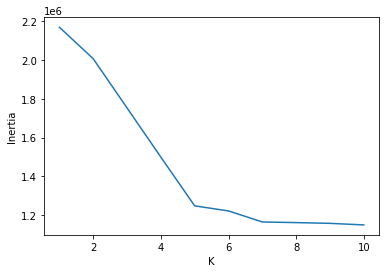

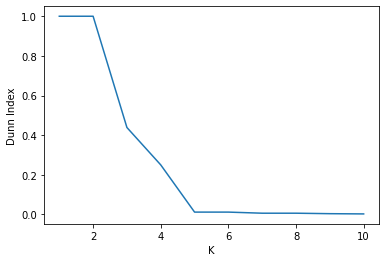

In [45]:
df_ = df[["ItemID", "Quantity", "UnitPrice", "CountryID"]]
df_np = df_.to_numpy()
plotGraphs(df_np)

K = 6 is an optimal choice

In [46]:
final_df, centers = driver(df, 6)
final_df

First index: 194028


,CustomerID,ItemID,Quantity,UnitPrice,CountryID,ClusterID
0,17850.0,-1.115621,-0.016289,-0.021301,-0.216026,0.0
1,17850.0,-1.114823,-0.016289,-0.012620,-0.216026,0.0
2,17850.0,-1.114024,-0.007118,-0.019234,-0.216026,0.0
3,17850.0,-1.113226,-0.016289,-0.012620,-0.216026,0.0
4,17850.0,-1.112428,-0.016289,-0.012620,-0.216026,0.0
...,...,...,...,...,...,...
541904,12680.0,0.495320,0.011224,-0.038871,0.134902,0.0
541905,12680.0,-0.782736,-0.016289,-0.025952,0.134902,0.0
541906,12680.0,1.448474,-0.025460,-0.004766,0.134902,0.0
541907,12680.0,1.453264,-0.025460,-0.004766,0.134902,0.0


In [47]:
final_df_np = final_df.to_numpy()
count_dict = {}
for i in range(final_df_np.shape[0]):
    if final_df_np[i][-1] not in count_dict:
        count_dict[final_df_np[i][-1]] = 1
    else:
        count_dict[final_df_np[i][-1]] = count_dict[final_df_np[i][-1]] + 1
for i in range(6):
    print("ClusterID " + str(i) + ": " + str(count_dict[i]))

ClusterID 0: 541860
ClusterID 1: 1
ClusterID 2: 2
ClusterID 3: 2
ClusterID 4: 42
ClusterID 5: 2
